In [106]:
import json
import os
from scipy import stats
from scipy.stats import normaltest, mannwhitneyu, ttest_ind, shapiro
import scipy
import numpy as np
import matplotlib.pyplot as plt
import datashader as ds
from datashader.mpl_ext import dsshow
import pandas as pd

In [107]:
PROJECT = "next"
TYPE = "LAYER"
SCORING_TYPE = "MAX"

In [108]:
f = open(f'../processed_data/{PROJECT}/{TYPE}/dim_x.json')
dataset_1 = json.loads(f.read())
f.close()

f = open(f'../processed_data/{PROJECT}/{TYPE}/dim_y.json')
dataset_2 = json.loads(f.read())
f.close()

In [109]:
def isMonotonic(A):
 
    return (all(A[i] <= A[i + 1] for i in range(len(A) - 1)) or
            all(A[i] >= A[i + 1] for i in range(len(A) - 1)))
 
 
# Print required result
print(isMonotonic(dataset_1) and isMonotonic(dataset_2))

False


In [110]:
corr, p_val = stats.kendalltau(dataset_1, dataset_2)
print(f"In {PROJECT} with {TYPE},")
# print("use Pearson correlation")
print ("P-Value: ", p_val)
print(f'corr = {corr}')

In next with LAYER,
P-Value:  0.0019944122341136786
corr = -0.020924058124781767


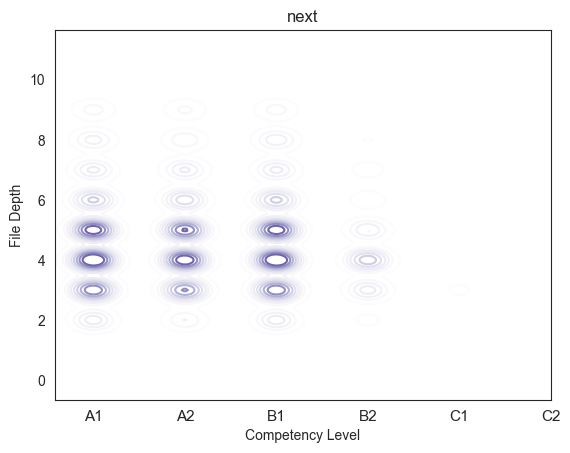

In [111]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

x = np.array(dataset_2)
y = np.array(dataset_1)
 
# set seaborn style
sns.set_style("white")
 
# Custom the color, add shade and bandwidth

figure, axe = plt.subplots()

sns.kdeplot(x=x, y=y, cmap="Purples", fill=False, bw_adjust=0.7)
axe.xaxis.set_ticks([1, 2, 3, 4, 5 ,6])
axe.xaxis.set_ticklabels(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], fontsize=11)

# Add label
plt.xlabel('Competency Level')
if TYPE == 'LAYER':
    plt.ylabel('File Depth')
else: 
    plt.ylabel(f'Filename Length')
title = 'sveltekit' if PROJECT == 'kit' else PROJECT
plt.title(title)


plt.show()